In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

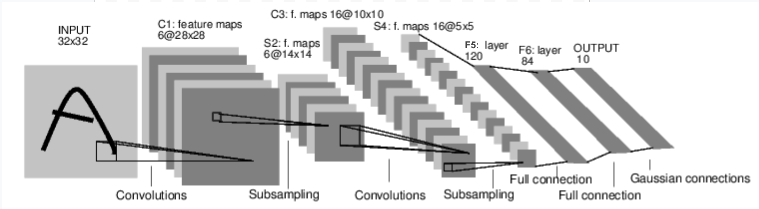

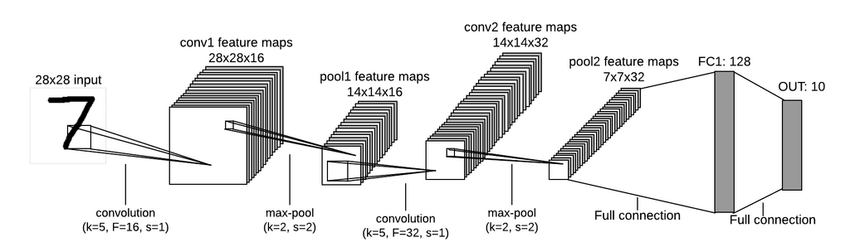

In [13]:
from IPython.display import Image, display

cnn_image_path = "../../images/cnn.png"
display(Image(filename=cnn_image_path))

cnn2_image_path = "../../images/cnn2.png"
display(Image(filename=cnn2_image_path))

$$ W_{out} = floor((W_{in} - K + 2P) / S) + 1 $$

$$ H_{out} = floor((H_{in} - K + 2P) / S) + 1 $$

$$ C_{out} = N_f $$

$ C_{out} $ : Number of output channels

$ N_f $ : Number of filters (kernels)

$ W_{out} $ : Width of the output feature map after convolution

$ H_{out} $ : Height of the output feature map after convolution

$ W_{in} $ : Width of the input feature map

$ H_{in} $ : Height of the input feature map

$ K $ : Size of the convolutional kernel (both width and height for a square kernel)

$ P $ : Padding added to the input feature map

$ S $ : Stride, the step size at which the convolutional kernel moves over the input

In [ ]:
class CNN(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(CNN, self).__init__()

        # in_channels: Number of channels in the input image.
        # out_channels: Number of channels produced by the convolution.
        # kernel_size (int/tuple): Size of the convolving kernel.
        # stride (int/tuple):  Stride of the convolution. Default: 1.
        # padding (int/tuple/str): Padding added to all four sides of the input. Default: 0.
        self.conv1 = nn.Conv2d(
            in_channels=input_channels,
            out_channels=32,
            kernel_size=3,
            stride=1,
            padding=1,
        )
        self.batchnorm1 = nn.BatchNorm2d(num_features=32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.batchnorm_fc = nn.BatchNorm1d(512)
        self.relu_fc = nn.ReLU()
        self.fc2 = nn.Linear(512, num_classes)
        # self.activation = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.batchnorm1(self.conv1(x))))
        x = self.pool2(self.relu2(self.batchnorm2(self.conv2(x))))
        x = self.flatten(x)
        x = self.fc2(self.relu_fc(self.batchnorm_fc(self.fc1(x))))
        # x = self.activation(self.fc2(self.relu_fc(self.batchnorm_fc(self.fc1(x)))))
        return x

    def train_model(
        self, train_data, train_labels, num_epochs=100, learning_rate=0.001
    ):
        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            # Convert data to PyTorch tensors
            inputs = torch.tensor(train_data, dtype=torch.float32)
            labels = torch.tensor(train_labels, dtype=torch.float32)

            # Forward pass
            outputs = self(inputs)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 1 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    def predict(self, input_data):
        # Convert data to PyTorch tensor
        inputs = torch.tensor(input_data, dtype=torch.float32)

        # Make predictions
        self.eval()
        with torch.no_grad():
            predictions = self(inputs)

        return torch.argmax(predictions, dim=1).numpy()

In [ ]:
# Example usage:
# Generate synthetic training data
num_samples = 100
input_channels = 3
image_height = 32
image_width = 32
num_classes = 10

# Randomly generate image data and corresponding labels
train_data = torch.randn((num_samples, input_channels, image_height, image_width))
train_labels = F.one_hot(
    torch.randint(0, num_classes, (num_samples,)), num_classes=num_classes
).float()

# Displaying the shape of the generated data (optional)
print("Train Data Shape:", train_data.shape)
print("Train Labels Shape:", train_labels.shape)

# Create an instance of the CNN model
model_cnn = CNN(input_channels, num_classes)
model_cnn.train_model(train_data, train_labels)

# Example test data
test_data = torch.randn((1, input_channels, image_height, image_width))

# Make predictions with CNN model using the predict method
predictions_cnn = model_cnn.predict(test_data)

print(
    "Predictions (CNN):", predictions_cnn
)  # In PyTorch, represents the raw scores/logits for each class.